# TP octobre 2023

## Consignes à lire 2 fois SVP

1. Ne pas changer le nom de ce fichier qui sera déposé sous moodle en fin de votre travail
2. Enregister régulièrement votre travail
3. Exécuter régulièrement tout votre notebook par exemple en relançant le noyau (Redémarrer & tout exécuter)
3. **N'ajouter aucune cellule** 
4. **Ne supprimer aucune cellule**
5. **Ne pas faire de copier-coller ou couper-coller de cellule**
    - en revanche, vous pouvez copier _le contenu_ d'une cellule et le coller dans une autre
5. Ne pas modifier les cellules qui indiquent     
    >  `# Ne pas écrire dans cette cellule`
5. Aucune cellule ne demande des entrées-clavier avec `input()`
6. **Comment répondre avec du code python**
    1. Répondre avec du code python qui **remplace** les 2 lignes :
    >    `# ENTRER VOTRE CODE A LA PLACE DE CES 2 LIGNES`  
    >    `  raise NotImplementedError()` 
    2. Laisser ces 2 lignes si vous ne répondez pas à la question
7. **Comment répondre avec du texte ?** 
    1. Les rares cellules qui attendent du texte indiquent  :
    > VOTRE REPONSE A LA PLACE DE CE TEXTE (format texte ou markdown)
8. Re-lire ces consignes


Ce sujet est accompagné des 4 fichiers `ref_c0.txt`, `ref_c1.txt`, `ref_c2.txt` et `./random100.txt`.

On va calculer **l'enveloppe convexe** d'un nuage de points du plan.
L'enveloppe convexe est la région délimitée par la ligne bleue : analogie avec un élastique entourant des points dans le plan (source [Wikipedia](https://fr.wikipedia.org/wiki/Enveloppe_convexe)).
Rassurez-vous, des précisions seront données dans la suite du sujet.
![ConvexHull source Wikipedia](fig/ConvexHull.png)


# Points du plan, relation d'ordre, orientation

- Un _point_ du plan est un couple  $(x, y)$ de nombres flottants.  
- $x$ et $y$ sont respectivement l'_abscisse_ et l'_ordonnée_ du point $p =(x, y)$.

## `x()`, `y()`

On représente un point `p` du plan par le `tuple` de ses deux coordonnées `x` et `y`.
La cellule suivante définit les points `O`, `I`, `J` du repère classique du plan -- ici en majuscules selon la convention de notation des constantes en python.

In [1]:
O = (0., 0.)
I = (1., 0.)
J = (0., 1.)

Ecrire les fonctions `x()` et `y()` qui retournent respectivement l'abscisse et l'ordonnée d'un point `p`. 

**Rmq.** Dans ce sujet, un point du plan est toujours représenté par un `tuple` de 2 `float`. Parlons-donc de "tuple-point". 
Pour améliorer la lisibilité **des fonctions dont un argument est _un_ "tuple-point", on se dispensera ici** de rajouter le paramètre "habituel" qui décrit la taille du "tuple-point" -- c-a-d. 2. 
Ainsi, l'abscisse du point `O` sera obtenue par l'appel `x(O)` et non `x(O, 2)`.

In [2]:
def x(p: tuple[float]) -> float:
    '''retourne l'abscice du point p'''
    return p[0]
    
    

In [3]:
# Ne pas écrire dans cette cellule

In [4]:
def y(p: tuple[float]) -> float:
    '''retourne l'abscice du point p'''
    return p[1]

In [5]:
# Ne pas écrire dans cette cellule

**Auto-validation**

In [6]:
assert x(O) == 0.
assert x(I) == 1.
assert y(O) == 0.
assert y(J) == 1.
assert y(I) == x(J)

## `==`

L'égalité de 2 points du plan est définie de façon classique comme l'égalité de leurs abscisses et de leurs ordonnées :
$$(x,y) = (x',y') \iff x = x' \text{ et } y = y'.$$  

On pourra utiliser l'opérateur python `==` entre deux "tuple-points" qui satisfait cette définition comme la cellule suivante l'illustre.

In [7]:
assert O == O
assert (O == I) == False
assert (I == J) == False
assert (J == J) == True

## `le()`

On définit la relation d'ordre suivante entre 2 points du plan :    
$$(x,y) \le (x',y') \iff x < x' \text{ ou } (x = x' \text{ et } y \le y').$$  

**A la différence de l'égalité, on n'utilisera pas l'opérateur `<=` de python entre deux "tuple-points".**

Ecrire la fonction `le()` ("le" pour _lower or equal_) telle que `le(p, q)` retourne la comparaison $p \le q$ pour $p$ et $q$ deux points du plan.  

In [8]:
def le(p: tuple[float], q: tuple[float]) -> bool:
    if (p[0] < q[0]) or (p[0] == q[0] and p[1] <= q[1]):
        return True
    else : return False

In [9]:
# Ne pas écrire dans cette cellule

**Auto-validation**

In [10]:
assert le(O, O) == True
assert le(O, I) == True
assert le(I, J) == False
assert le(J, I) == True
assert le(J, O) == False

## `orientation()`

![Orientation positive d'un triplet (p,q,r)](./fig/orient_pos.png)![Orientation négative d'un triplet (p,q,r)](./fig/orient_neg.png)

Un triplet `(p,q,r)` de points _non alignés_ du plan est _orienté positivement_
si l'angle des vecteurs `(pq, pr)` est dans $]0, \pi \ [$ (modulo $2\pi$). 
Sinon, il est _orienté négativement_.

On vérifie l'orientation du triplet `(p,q,r)` en calculant le signe de $det(pq,pr)$, le 
déterminant 2x2 des vecteurs `pq` et `pr`. 

**Le signe du déterminant et le sens d'orientation coïncident**. C-a-d. :
- un déterminant nul indique 3 points alignés, 
- un déterminant positif indique un triplet orienté positivement,
- et un déterminant négatif l'orientation opposée.

On rappelle que :
$$det(pq,pr) = (x_q - x_p)\times(y_r - y_p) - (y_q - y_p)\times(x_r -
x_p).$$


Ecrire la fonction `orientation()` qui :
- retourne 0 si les 3 points sont alignés,
- retourne 1 si les 3 points sont orientés positivement,
- et retourne -1 sinon.  

In [11]:
def orientation(p: tuple[float], q: tuple[float], r: tuple[float]) -> int:
    '''retourne l orientetion de trois pts (p,q,r)'''
    det = (q[0]-p[0])*(r[1]-p[1])-(q[1]-p[1])*(r[0]-p[0])
    if det==0 :
        return 0
    elif det>0 :
       return 1
    if det<0 :
        return -1

In [12]:
# Ne pas écrire dans cette cellule

**Auto-validation**

In [13]:
assert orientation(O, I, J) > 0
assert orientation(J, I, O) < 0

## `st()`

Ecrire la fonction `st()` qui retourne les coordonnées d'un point `p = [x,y]` sous la forme de la chaîne de caractères `"(x , y)"`. Dans cette chaîne de caractères, les coordonnées "x" et "y" sont séparées par un espace, une virgule et un espace, le tout étant mis entre parenthèses. L'auto-validation de la cellule qui suit illustre le format attendu pour les points `O` et `I`. 

In [14]:
def st(p: tuple[float]) -> str:
    s = f"({p[0]} , {p[1]})"
    return s
    

In [15]:
# Ne pas écrire dans cette cellule

**Auto-validation**

In [16]:
assert len(st(O)) == 11
assert st(O) == "(0.0 , 0.0)"
assert st(I) == "(1.0 , 0.0)"

L'affichage à l'écran des coordonnées d'un point `p` sera donc effectuée grâce au `print()` de la chaîne de caractères retournée par l'appel `st(p)`. La cellule suivante illustre ce traitement.

In [17]:
print(st(O))
print(st(I), st(J))

(0.0 , 0.0)
(1.0 , 0.0) (0.0 , 1.0)


# Nuage de points : traitements indispensables

On se place dans le plan euclidien.

- Un _nuage de points_ est un ensemble fini de points distincts du plan.
- On représente un nuage de $n$ points par une liste de `n` "tuple-points" distincts et **triés par ordre croissant** selon la relation d'ordre `le()`.

## Les nuages `C0`, `C1` et `C2`

La cellule suivante définit
- le nuage `C0` composé des 3 points `O`, `I` et `J`,
- le nuage `C1` qui ajoute le point (1/4, 1/4) à `C0`,
- le nuage `C2` qui ajoute le point (1/2, 3/4) à `C0`,

Ces nuages seront utilisés par la suite.
Noter l'ordre des points de leur représentation.

In [18]:
C0 = [ (0., 0.), (0., 1.), (1., 0.) ]
C1 = [ (0., 0.), (0., 1.), (0.25, 0.25), (1., 0.) ]
C2 = [ (0., 0.), (0., 1.), (0.5, 0.75), (1., 0.) ]

## `est_nuage()`

Ecrire `est_nuage()` qui vérifie si une liste de `n` points représente, ou non, un nuage de `n` points.
Cette fonction vérifie que la liste contient `n` points distincts et qu'ils sont stockés par ordre croissant.  

In [19]:
def est_nuage(c: list[tuple[float]], n: int) -> bool:
    
    
    s=1
    if len(c)==0 :
        return True
    for j in range(n-1):
        if le(c[j],c[j+1]) == True and ((c[j]==c[j+1])==False):
            s+=1
    if s == len(c) :
        return True
    else : 
        return False 
    
                
                
            
            
            
    
        
        

True

In [20]:
# Ne pas écrire dans cette cellule

**Auto-validation**

In [21]:
assert est_nuage(C0, 3) == True
assert est_nuage(C1, 4) == True
assert est_nuage(C2, 4) == True

NO_C = [I, O, J]
assert est_nuage(NO_C, 3) == False
NO_C = [O, I, I]
assert est_nuage(NO_C, 3) == False

## `est_dans()`

Ecrire **avec l'algorithme le plus efficace en terme de complexité en temps**, la fonction `est_dans()` qui indique si un point donné est, ou non, dans un nuage donné supposé **trié**.

In [22]:
def est_dans(p: tuple[float], c: list[tuple[float]], n: int) -> bool:
    
    for q in c:
        if p==q :
            return True
    return False
        
    
        
    

In [23]:
# Ne pas écrire dans cette cellule

**Auto-validation**

In [24]:
assert est_dans(O, C0, 3) == True
assert est_dans(I, C0, 3) == True
assert est_dans(J, C0, 3) == True
assert est_dans((0.25, 0.25), C1, 4) == True
assert est_dans((0.5, 0.75), C1, 4) == False

## `add_point()`

Ecrire la fonction `add_point()` qui ajoute un point à un nuage de points. 
Cette fonction modifie le nuage **de façon efficace en terme de complexité en espace** (pas de copie inutile).
En particulier, elle assure que le nuage obtenu est toujours composé de points distincts et ordonnés. 

In [25]:
def add_point(p: tuple[float], c: list[tuple[float]], n: int) -> None:

    
    if len(c) == 0 :
        c.append(p)
        return None 
    if est_dans(p,c,len(c))==True :
            return None
    for j in range(len(c)):
        if le(c[j],p) == True and (c[j]==p)==False:
            c.insert(j+1,p)
        else : continue
    return None



        

In [26]:
# Ne pas écrire dans cette cellule

**Auto-validation**

Remarque : cette auto-validation ne modifie pas le nuage constant `C0`. Elle introduit un autre nuage `c00`. 

In [27]:
c00 = []
assert est_nuage(c00, len(c00))

add_point(O, c00, len(c00))
assert len(c00) == 1
assert est_nuage(c00, len(c00))

add_point(I, c00, len(c00))
assert len(c00) == 2
assert est_nuage(c00, len(c00))

add_point(J, c00, len(c00))
assert len(c00) == 3
assert est_nuage(c00, len(c00))

for p in c00:
    assert est_dans(p, C0, len(C0))

# Piles en python : facile !

Une _pile_ est une structure de données dite "LIFO" pour _Last In - First Out_. 
- Ainsi la dernière donnée ajoutée à la pile (on dit _empiler_) sera la première enlevée (on dit _dépiler_).   
- On n'a pas besoin de connaître le nombre d'éléments empilés : il suffit de savoir si une pile _est vide_ ou non.  
- La dernière valeur empilée est le _sommet_ de la pile.  
- La _base_ de la pile est la dernière valeur qu'on pourra dépiler pour qu'elle devienne vide.

On a déjà vu cette notion en cours : la pile des appels d'un traitement récursif.

Dans la suite, on va avoir besoin de piles et d'empiler et dépiler des _points_ du plan.
Les listes python permettent d'implanter très facilement de telles **piles de points**. 

La cellule suivante définit les traitements nécessaires et suffisants pour manipuler **toutes** les piles de ce sujet. 

- Ainsi exceptée l'initialisation d'une pile vide (`= []`), aucune manipulation directe de la liste qui représente une pile n'est nécessaire.
- Remarquer que par cohérence avec la définition d'une pile, ces fonctions ne demandent pas la taille de la liste  qui la représente. 

In [28]:
def empiler(p: tuple[float], pile: list[tuple[float]]) -> None:
    '''empile le point p sur le sommet de pile'''
    pile.append(p)
    return None

def est_vide(pile: list[tuple[float]]) -> bool:
    return len(pile) == 0

def depiler(pile: list[tuple[float]]) -> tuple[float] :
    '''dépile et retourne le point sommet de pile'''
    assert not(est_vide(pile))
    p = pile.pop()
    return p

La cellule suivante illustre comment définir et utiliser facilement une pile `s`.

In [29]:
s = [] # initialisation de la pile vide s 
assert est_vide(s) == True 
empiler(O, s) 
empiler(I, s) 
assert est_vide(s) == False
p = depiler(s) 
assert p == I
p = depiler(s) 
assert p == O
assert est_vide(s) == True 

**Interprétation**

Expliciter les états successifs de la pile `s` lors des traitements de la cellule ci-dessus.

initialisation : la pile est vide, on confirme ca avec un assert qui fait appel a la fct est_vide()
empilage du premier element(base) : notre pile s est de len(s)==1
empilage du 2 eme element : len(s)==2
dépilage : pour dépiler on assert que la pile n est pa vide
après le 1 er dépilage : la liste s contient que la base, le premier element ajouté
2 eme dépilage : notre liste devient vide.

# Enveloppe convexe : on y va !

Un ensemble $e$ est _convexe_  si le segment [p,q] qui relie deux
points quelconques de $e$ est inclus dans $e$.  

![exemple d'ensembles convexes et non convexe](./fig/conv.png)
![exemple d'ensembles convexes et non convexe](./fig/no-conv.png)

L'_enveloppe convexe_ d'un nuage de points `c` est le plus petit
polygone convexe qui contient tous les points de `c`.

![L'enveloppe convexe du nuage de points 'data_nuage_10.txt'](./fig/env_conv10.png)
![L'enveloppe convexe du nuage de points 'data_nuage_100.txt'](./fig/env_conv100.png)

De façon imagée, si on représente un nuage de points du plan par des clous plantés sur une planche, l'enveloppe convexe du nuage de points est un élastique qui engloble tous les clous (voir figure en début de sujet).

On va étudier un algorithme qui construit l'enveloppe convexe d'un nuage de points. 

- On part d'un nuage `c` trié par ordre croissant.
- `p0` désigne le plus petit point de `c`, _ie._ celui le plus "en bas à gauche".  
- On balaie de gauche à droite avec une droite verticale le nuage `c`.
- Chaque point `p` rencontré par la droite verticale met à jour l'enveloppe convexe (\*) du sous-nuage à gauche de ce point `p`. 
    - La _partie supérieure_ de l'enveloppe convexe est au dessus du segment `[p0, p]`.  
    - La _partie inférieure_ de l'enveloppe convexe est en dessous du segment `[p0, p]`. 

On note respectivement `esup` et  `einf` les parties supérieure et inférieure de l'enveloppe convexe.

En pratique, cet algorithme : 
- construit d'abord la partie supérieure `esup` de l'enveloppe convexe, 
- puis sa partie inférieure `einf`,
- et en déduit l'enveloppe convexe après un (petit) traitement de ces parties supérieure et inférieure.

Ainsi la mise à jour (\*) s'effectue en fait sur les parties supérieure et inférieure de l'enveloppe convexe.  

Détaillons maintenant comment construire l'enveloppe supérieure `esup`. 
Une approche similaire permettra de construire l'enveloppe inférieure `einf`.

- `esup` est une pile, 
- `esup` est initialisée comme suit :
    - La base de `esup` est le point `p0`, 
    - puis on empile ensuite `p1` le point immédiatement supérieur à `p0`.
- La pile `esup` est ainsi composée d'au moins deux éléments.  

On balaye de gauche à droite le nuage de points.
Pour chaque point `p` rencontré :  
- on dépile `q` puis `r` les 2 derniers points empilés sur `esup`,
- on teste l'orientation `(p, q, r)`.
    - Si "orientation >= 0", on empile `r`, `q` puis `p` ; et c'est fini pour `p`.
    - Sinon :
        - on empile `r` (`q` n'est définitivement plus dans `esup`) 
        - on recommence à tester l'orientation `(p, q, r)` où `q` et `r` sont les 2 derniers points empilés sur `esup` 
            - jusqu'à réussir "orientation >= 0" et comme précédemment, on empile `r`, `q` puis `p` et c'est fini pour `p` ;
            - ou que `esup` ne contienne plus qu'un point 
                - dans ce cas, on on empile `p` et c'est fini pour `p`.

## `majesup()`

Ecrire la fonction `majesup()` ("mise à jour enveloppe supérieure") qui applique cet algorithme pour ajouter ou non, **un point `p`** donné à l'enveloppe supérieure `pile` d'un nuage de points `c` donné.

Remarque : cette fonction suppose que `pile` existe et a été initialisée comme indiqué ci-dessus, _ie._ avec `p0` et `p1`.

In [161]:
def majesup(p: tuple[float], pile: list[tuple[float]]) -> None:
    
    
    q=depiler(pile)
    r=depiler(pile)
    
    if orientation(p,q,r) >= 0 :
        empiler(r,pile)
        empiler(q,pile)
        empiler(p,pile)
        return None
        
    else :
        empiler(r,pile)
        if (len(pile)!=1) :
             q=depiler(pile)
             r=depiler(pile)
             while(orientation(p,r,q)<0 and len(pile)>1):
                    empiler(r,pile)
                    q=depiler(pile)
                    r=depiler(pile)
             empiler(r,pile)
             empiler(q,pile)
             empiler(p,pile)
             return None
            
        else : 
                if  len(pile)==1 :
                    empiler(p,pile)
                    return None 
    

In [162]:
# Ne pas écrire dans cette cellule

**Auto-validation**

- Les enveloppes convexes inférieures des nuages `C0` et `C1` sont égales et contiennnent tous les points de `C0`.
- Celle du nuage `C2` contient tous les points de `C2`.

In [163]:
# enveloppe supérieure du nuage C0=(O,J,I)
assert len(C0) > 1

# intialisation de l'enveloppe sup es de C0
es = []
empiler(C0[0], es)
empiler(C0[1], es)
assert es == [(0.0, 0.0), (0.0, 1.0)]

# majesup pour le dernier point de C0
for i in range(2, len(C0)):
    majesup(C0[i], es)
assert es == [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0)]

# intialisation de l'enveloppe sup es de C1=(O,I,J,(1/4,1/4))
es = []
empiler(C1[0], es)
empiler(C1[1], es)

# majesup pour les points de C1
for i in range(2, len(C1)):
    majesup(C1[i], es)
assert es == [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0)]

# intialisation de l'enveloppe sup es de C2=(O,I,J,(1/2,3/4))
es = []
empiler(C2[0], es)
empiler(C2[1], es)

# majesup pour les points de C2
for i in range(2, len(C2)):
    majesup(C2[i], es)
assert es == [(0.0, 0.0), (0.0, 1.0), (0.5, 0.75), (1.0, 0.0)]

## `majeinf()`

L'_enveloppe convexe inférieure_ est obtenue de façon similaire avec une deuxième pile `einf` et un test d'orientation inverse.  

Ecrire la fonction `majeinf()` qui ajoute ou non, un point `p` donné à l'enveloppe inférieure `pile` d'un nuage de points `c` donné.

Remarque : cette fonction suppose que `pile` existe et a été initialisée comme indiqué ci-dessus, _ie._ avec `p0` et `p1`.

In [164]:
def majeinf(p: tuple[float], pile: list[tuple[float]]) -> None:
    
    
    q=depiler(pile)
    r=depiler(pile)
    
    if orientation(p,q,r) <= 0 :
        empiler(r,pile)
        empiler(q,pile)
        empiler(p,pile)
        return None
        
    else :
        empiler(r,pile)
        if (len(pile)!=1) :
             q=depiler(pile)
             r=depiler(pile)
             while(orientation(p,r,q)>0 and len(pile)>1):
                    empiler(r,pile)
                    q=depiler(pile)
                    r=depiler(pile)
             empiler(r,pile)
             empiler(q,pile)
             empiler(p,pile)
             return None
            
        else : 
                if  len(pile)==1 :
                    empiler(p,pile)
                    return None 
    

In [34]:
# Ne pas écrire dans cette cellule

**Auto-validation**

Les enveloppes convexes inférieures des trois nuages `C0, C1` et `C2` sont égales.

In [35]:
# enveloppe inférieure du nuage (O,I,J)
assert len(C0) > 1

for c in (C0, C1, C2):
    ei = []
    # initialisation ei
    empiler(c[0], ei)
    empiler(c[1], ei)

    # majeinf pour les autres points de c
    for i in range(2, len(c)):
        majeinf(c[i], ei)
    
    # toutes les ei sont les mêmes
    assert ei == [(0.0, 0.0), (1.0, 0.0)]

## `env_convexe()`

L'enveloppe convexe `econv` est une pile construite à partir des piles  `esup` et `einf` en y ajoutant successivement chaque point visité par le parcours suivant :  
1. l'enveloppe convexe supérieure est parcourue de la gauche vers la droite, _ie._ en partant de `p0`, 
2. puis l'enveloppe convexe inférieure est parcourue de la droite vers la gauche, _ie._ en allant vers `p0`,  
3. **cependant** l'extrémité droite de l'une **ou** de l'autre de ces enveloppes **n'est pas répétée**,
    - cette extrémité est le point le plus "en haut à droite" du nuage du point
    - il est présent dans les enveloppes convexes supérieure et inférieure
4. le sommet de `econv` répète naturellement sa base `p0`.

Ecrire la fonction `env_convexe()` qui génère l'enveloppe convexe `econv` d'un nuage de points `c` donné. Cette fonction utilisera les fonctions `majesup()` et `majeinf()` pour obtenir les parties supérieure et inférieure, puis effectuera la construction décrite pour obtenir et retourner `econv`.
Ainsi, les parties supérieure et inférieure de cette construction seront pas ré-utilisées à l'extérieur de cette fonction. 

In [134]:
import copy
def env_convexe(c : list[tuple[float]], n : int) -> list[tuple[float]]:
    pilesup = []
    empiler(c[0], pilesup)
    empiler(c[1], pilesup)
    for i in range(2, len(c)):
        majesup(c[i], pilesup)
    

    pileinf = []
    empiler(c[0], pileinf)
    empiler(c[1], pileinf)
    for i in range(2, len(c)):
        majeinf(c[i], pileinf)
    

    pile_conv = []
    for i in range(len(pilesup)) :
        pile_conv.append(pilesup[i])
    
    for j in range(len(pileinf)-1) :
        pile_conv.append(pileinf[j])
    
    return pile_conv
        
    


    
    

In [135]:
# Ne pas écrire dans cette cellule

**Auto-validation**

In [136]:
assert env_convexe(C0, 3) == [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0)]
assert env_convexe(C1, 4) == [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0)]
assert env_convexe(C2, 4) == [(0.0, 0.0), (0.0, 1.0), (0.5, 0.75), (1.0, 0.0), (0.0, 0.0)]

#  Tracer des nuages et leurs enveloppes convexes

Qui dit tracer, dit `matplotlib` :

In [137]:
import matplotlib.pyplot as plt

- En complément du cours, des feuilles résumés de niveau débutant et intermédiaires sont en ligne sous moodle
- `plt.plot` trace selon la même logique aussi bien des courbes (de points) que des nuages (de points)

## `plot_nuage()`

Utiliser `matplotlib` pour écrire `plot_nuage()` qui permet d'obtenir le tracé d'un nuage donné selon le modèle suivant. 
Le paramètre optionnel `nom_nuage` permet de préciser le titre du tracé.

In [138]:
import numpy as np
def plot_nuage(c: list[tuple[float]], n: int, nom_nuage : str = "") -> None:
    x=[]
    y=[]
    for i in range(len(c)) :
        x.append(c[i][0])
        y.append(c[i][1])
    xpoints = np.array(x)
    ypoints = np.array(y)

    
    plt.plot(xpoints,ypoints, "o")
    plt.title(f"{nom_nuage}")
    plt.show()
    return None
        
        
    

**Modèle pour auto-validation**

![C0.png](fig/C0.png)

Ce tracé est obtenu par l'exécution de la cellule suivante. 

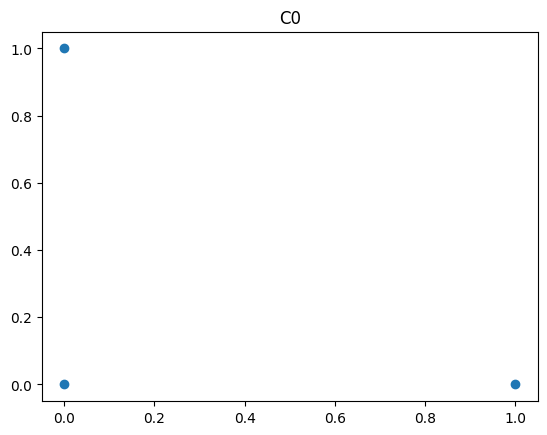

In [139]:
plot_nuage(C0, len(C0), "C0")

**Application**

Tracer les nuages `C1` et `C2`.

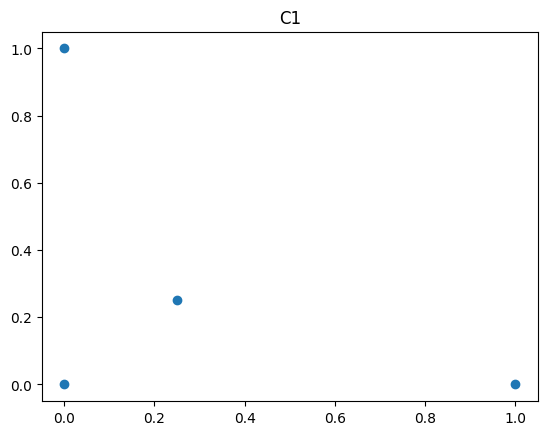

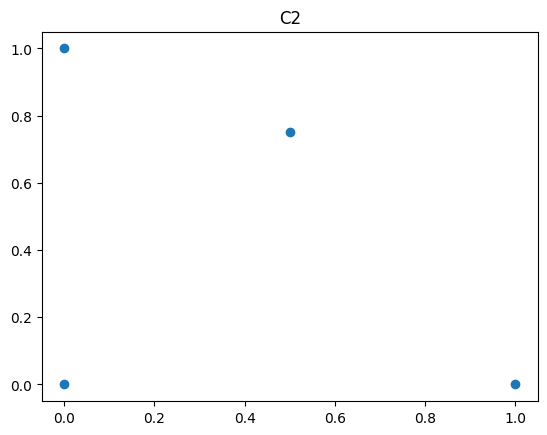

In [140]:
plot_nuage(C1, len(C1), "C1")
plot_nuage(C2, len(C2), "C2")

## ($\star$) `plot_env_convexe()`

`plot_env_convexe()` trace le nuage de `n` points `c` et son enveloppe convexe. 
De façon optionnnelle, le tracé est sauvegardé dans le fichier `filename`.

Le tracé de l'enveloppe convexe s'appuie sur le module `numpy`  et des sous-modules de `matplotlib` :
- le module `numpy` définit la "fonction-méthode" `array` qui transforme d'une pile de points en un tableau de type `ndarray` de points
- le sous-module `matplotlib.path` définit la "fonction-méthode" `Path` qui, à partir d'un `ndarray` de points, construit et retourne la suite des segments qui relient deux points successifs. 
- le module `matplotlib.patches` définit la "fonction-méthode" `PathPatch` qui construit et retourne la surface intérieure définie par sa frontière -- comme par exemple une suite de segments. Le paramètre `facecolor = yellow` colore cette surface comme pour les tracés donnés précédemment.     

La cellule suivante illustre l'utilisation des ces 3 fonctions méthodes sur les points du nuage `C0`.

[[0. 0.]
 [0. 1.]
 [1. 0.]]
[0. 0. 1.] [0. 1. 0.]


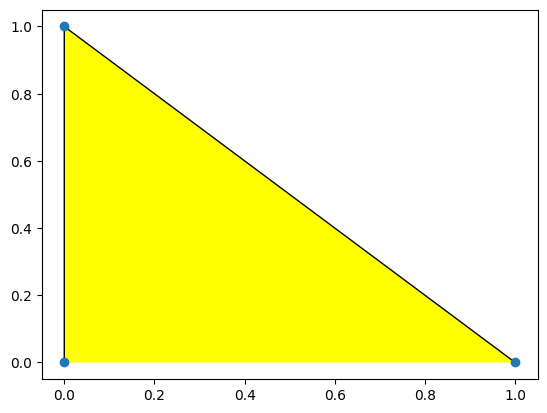

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path 
import matplotlib.patches as patches

# transforme une liste de points en un ndarray de points
t_c0 = np.array(C0)
print(t_c0)
print(t_c0[:,0], t_c0[:,1])

# définit la suite des segments qui relie 2 points successifs d'un ndarray de points
p_c0 = Path(t_c0)

# définit et colore en 'yellow' la surface intérieure de frontière la suite de segments p_c0
s_c0 = patches.PathPatch(p_c0, facecolor='yellow')

# trace les 3 points de C0 et la surface intérieure colorée qu'ils définissent 
fig, ax = plt.subplots()
ax.plot(t_c0[:,0], t_c0[:,1], 'o') 
ax.add_patch(s_c0)


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path 
import matplotlib.patches as patches

def plot_env_convexe(c : list[tuple[float]], n: int, nom_nuage: str = "", filename: str = None) -> None:

    t = np.array(c)
    p = Path(t)
    s = patches.PathPatch(p, facecolor='yellow')
    fig, ax = plt.subplots()
    ax.plot(t[:,0], t[:,1], 'o') 
    ax.add_patch(s)
    plot_nuage(env_convexe(c, n), n, nom_nuage)
    
    return None
    
    
        

**Modèle pour auto-validation**

![C0.png](fig/envC0.png)

Ce tracé est obtenu par l'exécution de la cellule suivante. 

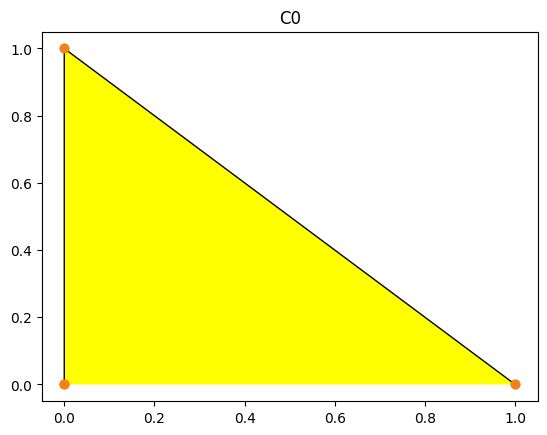

In [74]:
plot_env_convexe(C0, 3, "C0")

**Application**

Tracer les nuages `C1` et `C2`accompagnés de leur enveloppe convexe.

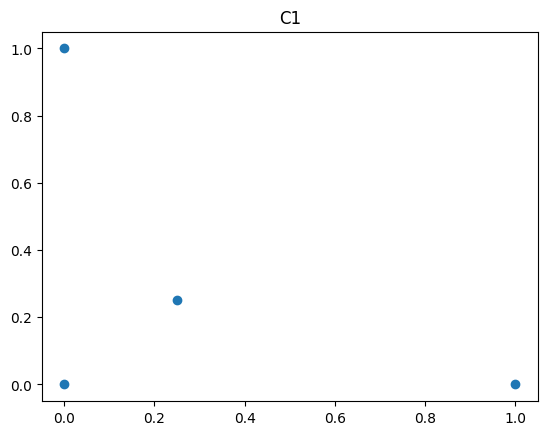

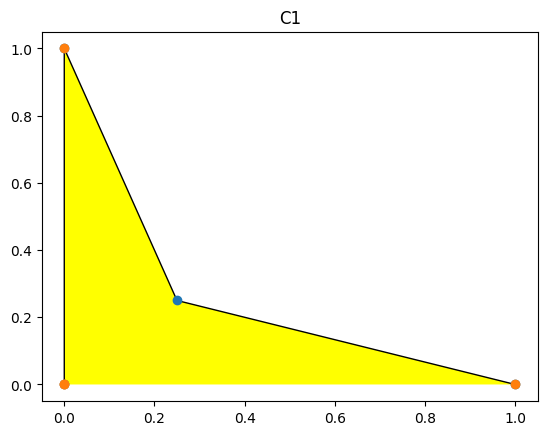

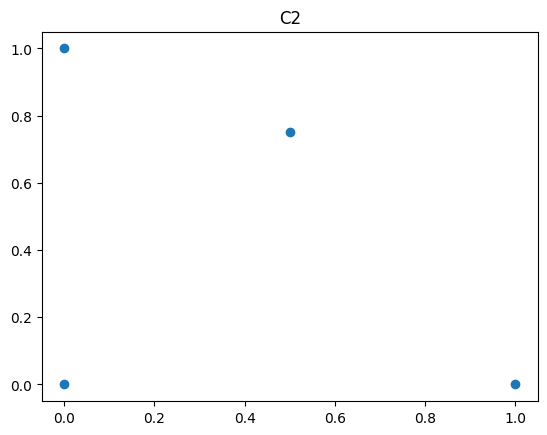

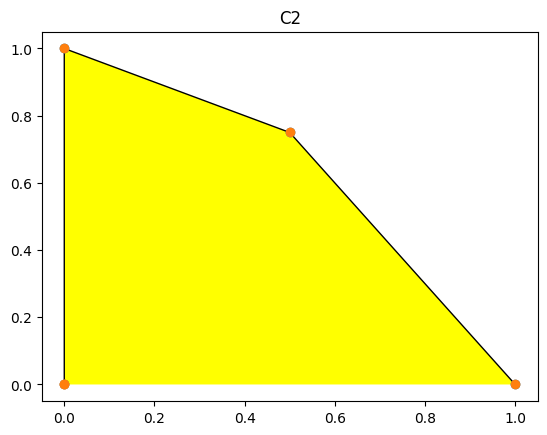

In [141]:
plot_nuage(C1, 4, "C1")
plot_env_convexe(C1, 4, "C1")
plot_nuage(C2, 4, "C2")
plot_env_convexe(C2, 4, "C2")



# ($\star$) Deux tracés plus complets

On finit ce travail en calculant et en traçant l'enveloppe convexe :
- d'un nuage de point aléatoires et
- d'un nuage de point définis dans un fichier.

## Nuage aléatoire

### `genere_nuage()`

Ecrire la fonction `genere_nuage()` qui génère et retourne un nuage de `n` points aléatoires du carré `[0, 1] x [0, 1]`.
Se souvenir que les points d'un nuage sont triés de façon croissante selon `le`.
La figure suivante est un exemple d'un tel nuage.

![Un nuage de points aléatoires](fig/nuage.png)

In [127]:
import random
def genere_nuage(n: int) -> list[tuple[float]]:
    random.seed(20)
    c=[random.random() for i in range(n)]
    random.seed(10000)
    b=[random.random() for i in range(n)]
    d=[None for i in range(n)]
    for i in range(n) :
        d[i]=(c[i],b[i])

    for i in range(n):
        indx_min=i
        for j in range(i+1,n):
            if le(d[j],d[indx_min]) :
                indx_min=j
        c=d[i]
        d[i]=d[indx_min]
        d[indx_min]=c
                
    return d
        
        

    
    
    
    


In [128]:
# Ne pas écrire dans cette cellule

**Auto-validation**

In [129]:
c10 = genere_nuage(10)
assert len(c10) == 10
for p in c10:
    assert le(O, p)
    assert le(p, (1.,1.))
assert est_nuage(c10, len(c10))

**Interprétation**

Que vérifie l'auto-validation précédente ?

elle verifie que les point de notre liste sont comprise dans le carré [0, 1] x [0, 1], l echelle de notre plot 
elle verifie que les points sont distincts, et que la liste est d ordre croissant, pour qu'elle soit un nuage 

### Application

Générer un nuage de 25 points aléatoires, calculer et tracer son enveloppe convexe.

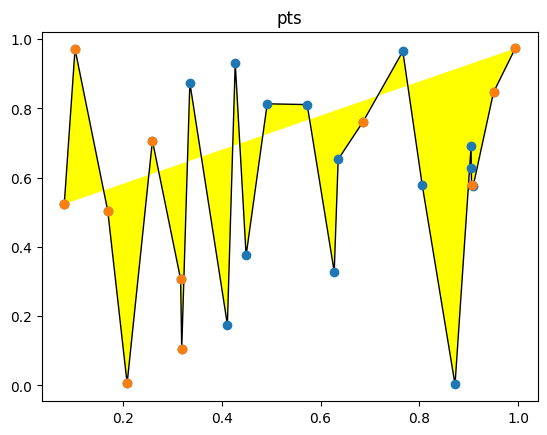

In [142]:
pts = genere_nuage(25)
plot_env_convexe(pts, 25, "pts")

## Nuage défini par un fichier

On aura besoin de comparer des fichiers. Exécuter la cellule suivante sera utile.

In [ ]:
import filecmp

### `save_nuage()`

Ecrire la fonction `save_nuage()` qui stocke un  nuage de points dans le fichier texte arbitraire `filename` selon le format suivant.
- La première ligne contient le nombre `n` de points du nuage.
- Chaque ligne suivante contientun point dans le format de l'affichage avec `st()` , c-a-d. abscisse et ordonnée **séparées par un espace, une virgule et un espace, le tout entre parenthèses**.
    - exemple pour le point `O`:
    ```(0.0 , 0.0)```

In [175]:
def save_nuage(c: list[tuple[float]], n: int, filename: str) -> None:
    with open(f"{filename}.txt", "w") as f :
        f.write(f"{n}\n")
        for l in c :
            f.write(st(l))
        return None
        

In [176]:
# Ne pas écrire dans cette cellule

**Auto-validation**

Le module `filecmp` permet de comparer le contenu de fichiers.
La validation suivante compare vos fichiers avec des fichiers "de référence" inclus dans l'archive zip du sujet.

- La cellule suivante utilise la syntaxe des chemins d'accès sous linux ou mac.  
- Pour windows, vous pouvez modifier ces chemins d'accès -- par exemple en remplaçant les `/` en `\\`.

In [177]:
save_nuage(C0, 3, "./c0.txt")
assert filecmp.cmp("./ref_c0.txt", "./c0.txt", shallow=False)

save_nuage(C1, 4, "./c1.txt")
assert filecmp.cmp("./ref_c1.txt", "./c1.txt", shallow=False)

save_nuage(C2, 4, "./c2.txt")
assert filecmp.cmp("./ref_c2.txt", "./c2.txt", shallow=False)

NameError: name 'filecmp' is not defined

###  `read_nuage()`

Ecrire la fonction `read_nuage()` qui lit un fichier contenant un  nuage de points stockés selon le format défini par `save_nuage()` et retourne le nuage correspondant.

In [ ]:
def read_nuage(filename: str) -> list[tuple[float]]:
    
    with open(f"{filename}.txt", "r") as f :
        c = f.readlines(f"{filename}")
        
        return None
        

In [ ]:
# Ne pas écrire dans cette cellule

**Auto-validation**

Même remarque que précédemment pour les chemins d'accès à ces fichiers.

In [ ]:
tmp_c0 = read_nuage("./c0.txt")
assert tmp_c0 == C0
tmp_c0 = read_nuage("./ref_c0.txt")
assert tmp_c0 == C0
tmp_c1 = read_nuage("./c1.txt")
assert tmp_c1 == C1

### Génération du fichier-nuage

1. Générer un nuage de 100 points aléatoires dans le carré [0,1]x[0,1]
    - se souvenir que les points d'un nuage sont triés de façon croissante selon `le`
2. stocker ce nuage dans un fichier de nom arbitraire

Le fichier `"./random100.txt"` est un exemple du résultat de ce traitement.

In [ ]:
# ENTRER VOTRE CODE A LA PLACE DE CES 2 LIGNES
raise NotImplementedError()

### Lecture d'un fichier-nuage, calcul et affichage de son enveloppe convexe

1. Lire le nuage défini par le fichier généré à la question précédente
2. Calculer et afficher son enveloppe convexe
3. Enregistrer le tracé du nuage et de son enveloppe convexe dans un fichier `png` de nom arbitraire.

Voilà un exemple de ce que vous pouvez obtenir à partir du fichier `"./random100.txt"`.
![](./fig/random100.png)

In [ ]:
# ENTRER VOTRE CODE A LA PLACE DE CES 2 LIGNES
raise NotImplementedError()